# AI Lista 5 - Sieci neuronowe

#### Zuzanna Sikorska, 260464

Zbiór danych: https://eigentaste.berkeley.edu/dataset/

Dane żartów: `jester_dataset_1_joke_texts.zip` (92KB)

Użytkownicy oceniali żarty w skali od -10 do 10. W zbiorze danych znajduje się 24983 użytkowników, którzy ocenili 36 lub więcej żartów. Pierwsza kolumna to liczba żartów oceniona przez użytkownika, a kolejne to oceny żartów. Wartości 99 oznaczają brak oceny.

Dane ocen: `jester_dataset_1_1.zip` (3.9MB)

#### Przydatne importy:

In [287]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.style.use('default')
import warnings 
warnings.filterwarnings('ignore')

#### Wczytanie danych:

Wczytanie danych ocen żartów.

In [288]:
ratings_data = pd.read_excel('jester-data-1.xls', header=None)
ratings_data.shape

(24983, 101)

In [289]:
ratings_data.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,49,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,...,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,48,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,...,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,91,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


Wczytanie danych tekstów żartów.

In [290]:
with open("jokes/init21.html", "r") as f:
    contents = f.read()
    soup = BeautifulSoup(contents, 'html.parser')
    joke1 = soup.prettify()
    print(joke1)

<html>
 <head>
  <title>
   Joke 21
  </title>
 </head>
 <body bgcolor="#fddf84" text="black">
  <table cellpadding="0" cellspacing="0" width="620">
   <td width="130">
   </td>
   <td width="470">
    <br/>
    <ul>
     <font size="+1">
      <i>
      </i>
     </font>
    </ul>
    <p>
     <br/>
     <center>
      <font color="red" size="+2">
      </font>
     </center>
     <ul>
      <font size="+1">
       <br/>
       <!--begin of joke -->
       What's the difference between a used tire and 365 used condoms?
       <p>
        One's a Goodyear, the other's a great year.
        <!--end of joke -->
       </p>
      </font>
     </ul>
    </p>
   </td>
  </table>
 </body>
</html>



In [291]:
with open("jokes/init21.html", "r") as f:
    contents = f.read()
    soup = BeautifulSoup(contents, 'html.parser')
    joke1 = soup.find('font', size="+1").text.strip()
    print(joke1)

In [292]:
jokes_data = []

for num_joke in range(1, 101):
    with open(f'jokes/init{num_joke}.html', 'r') as f:
        contents = f.read()
        soup = BeautifulSoup(contents, 'html.parser')
        possible_joke = soup.findAll('font', size="+1")
        if len(possible_joke) == 1:
            joke = possible_joke[0].text.strip()
        elif len(possible_joke) == 2:
            joke = possible_joke[1].text.strip()
        jokes_data.append(joke)

len(jokes_data)

100

In [293]:
jokes_data[:100]

['A man visits the doctor. The doctor says "I have bad news for you.You have\ncancer and Alzheimer\'s disease". \nThe man replies "Well,thank God I don\'t have cancer!"',
 'This couple had an excellent relationship going until one day he came home\nfrom work to find his girlfriend packing. He asked her why she was leaving him\nand she told him that she had heard awful things about him. \n\n"What could they possibly have said to make you move out?" \n\n"They told me that you were a pedophile." \n\nHe replied, "That\'s an awfully big word for a ten year old."',
 "Q. What's 200 feet long and has 4 teeth? \n\nA. The front row at a Willie Nelson Concert.",
 "Q. What's the difference between a man and a toilet? \n\nA. A toilet doesn't follow you around after you use it.",
 "Q.\tWhat's O. J. Simpson's Internet address? \nA.\tSlash, slash, backslash, slash, slash, escape.",
 "Bill & Hillary are on a trip back to Arkansas. They're almost out of gas, so Bill pulls into a service station on the o

#### Ekstrakcja cech:

In [294]:
model = SentenceTransformer('bert-base-cased')
jokes_embeddings = model.encode(jokes_data)

jokes_embeddings.shape

No sentence-transformers model found with name C:\Users\sikor/.cache\torch\sentence_transformers\bert-base-cased. Creating a new one with MEAN pooling.
Some weights of the model checkpoint at C:\Users\sikor/.cache\torch\sentence_transformers\bert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassificati

(100, 768)

In [295]:
jokes_embeddings[0][:10]

array([ 0.22689956,  0.08085244,  0.1937923 ,  0.22237049,  0.3269367 ,
       -0.07618451, -0.09126277,  0.06489525, -0.10053376, -0.2785739 ],
      dtype=float32)

#### Przygotowanie danych:

In [296]:
jokes_ratings = ratings_data.drop(0, axis=1)
jokes_ratings= jokes_ratings.replace(99, np.nan)
jokes_ratings.head()

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,...,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,...,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


In [297]:
jokes_avg_ratings = jokes_ratings.mean(axis=0)
jokes_avg_ratings.shape

(100,)

In [298]:
jokes_avg_ratings.head()

1    0.904573
2    0.208460
3    0.316574
4   -1.449114
5    0.403556
dtype: float64

In [299]:
X = jokes_embeddings
y = jokes_avg_ratings

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=131)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((80, 768), (80,), (20, 768), (20,))

In [300]:
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train)
X_test_standardized = scaler.transform(X_test)

X_train_standardized.shape, X_test_standardized.shape

((80, 768), (20, 768))

#### Przetestowanie działanie podstawowego modelu MLP

In [317]:
def test_regression(regr, X_train, y_train, X_test, y_test, epochs=1000):
    train_errors = []
    test_errors = []

    for _ in range(epochs):
        regr.partial_fit(X_train, y_train)
        train_errors.append(mean_squared_error(y_train, regr.predict(X_train))) # the same as regr.loss_ * 2
        test_errors.append(mean_squared_error(y_test, regr.predict(X_test)))

    return train_errors, test_errors
   

In [302]:
def test_regression_with_batch(regr, X_train, y_train, X_test, y_test, epochs=1000, batch_size=10):
    train_errors = []
    test_errors = []

    for _ in range(epochs):
        for i in range(0, X_train.shape[0], batch_size):
            X_train_batch = X_train[i:i+batch_size]
            y_train_batch = y_train[i:i+batch_size]
            regr.partial_fit(X_train_batch, y_train_batch)
            
        train_errors.append(mean_squared_error(y_train, regr.predict(X_train))) # the same as regr.loss_ * 2
        test_errors.append(mean_squared_error(y_test, regr.predict(X_test)))

    return train_errors, test_errors

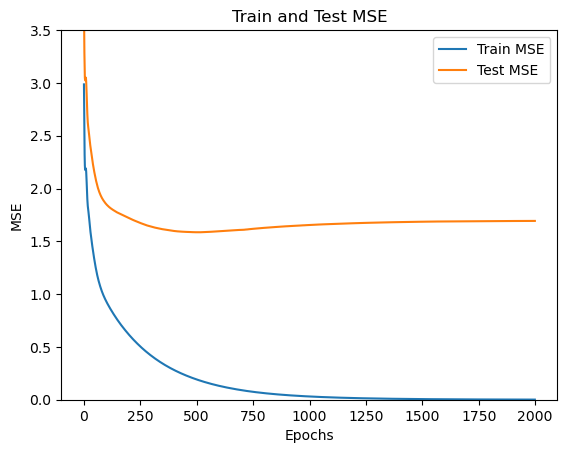

In [319]:
regr = MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant')
train_errors, test_errors = test_regression(regr, X_train, y_train, X_test, y_test, epochs=2000)

plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.title('Train and Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim(0, 3.5)
plt.legend()
plt.show()

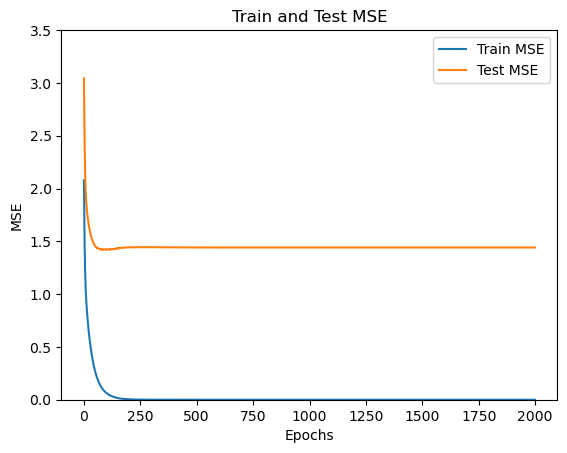

In [304]:
regr = MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant')
train_errors, test_errors = test_regression_with_batch(regr, X_train, y_train, X_test, y_test, epochs=2000)

plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.title('Train and Test MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim(0, 3.5)
plt.legend()
plt.show()

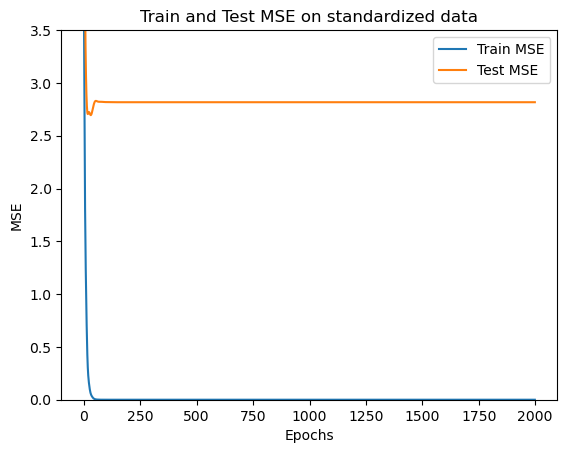

In [305]:
regr = MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant')
train_errors, test_errors = test_regression(regr, X_train_standardized, y_train, X_test_standardized, y_test, epochs=2000)

plt.plot(train_errors, label='Train MSE')
plt.plot(test_errors, label='Test MSE')
plt.title('Train and Test MSE on standardized data')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim(0, 3.5)
plt.legend()
plt.show()

Podsumowanie:

Zdecydowanie najszybciej nauczył się model, który na wejściu przyjmował ustandarysowane dane, jednak osoągnął również najgorszy błąd średniokwadratowy an zbiorze testowym. Trochę wolniej nauczył się model wykorzystujący dzielenie danych wejściowych na partie podczas każdej epoki, ale osiągnął najlepszy wynik na zbiorze testowym. Model wykorzystujący nieprzetworzone dane i nie dzielący ich na partie wewnątrz epok potrzebował kilka razy więcej czasu na naukę, ale osiągnął wynik niewiele gorszy od modelu dzielącego dane na partie. Co ciekawe model ten osiągnął w pewnym momencie nauki ciut lepszy wynik niż wynik po zakończeniu nauki, co może świadczyć o drobnym przeuczeniu modelu.

#### Badanie wpływu tempa uczenia na osiągane wyniki

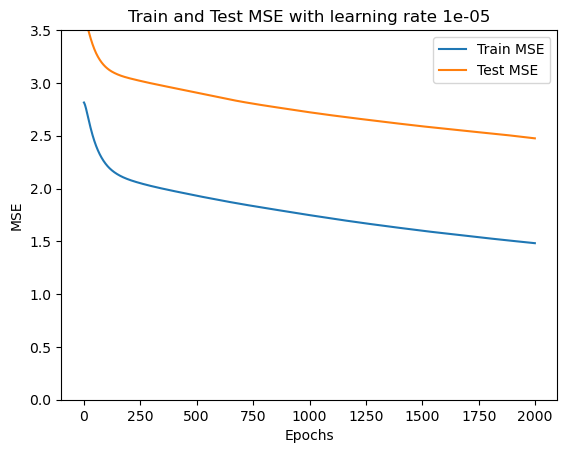

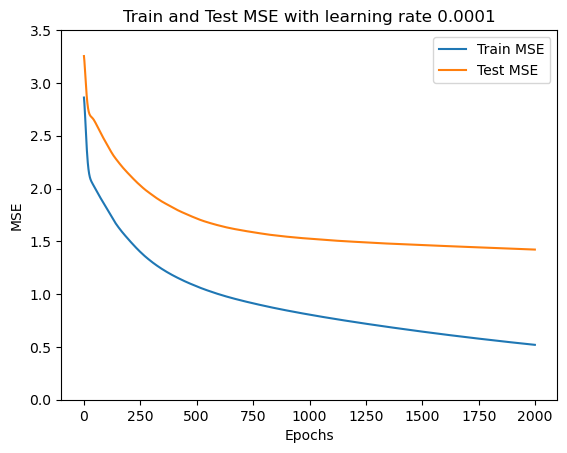

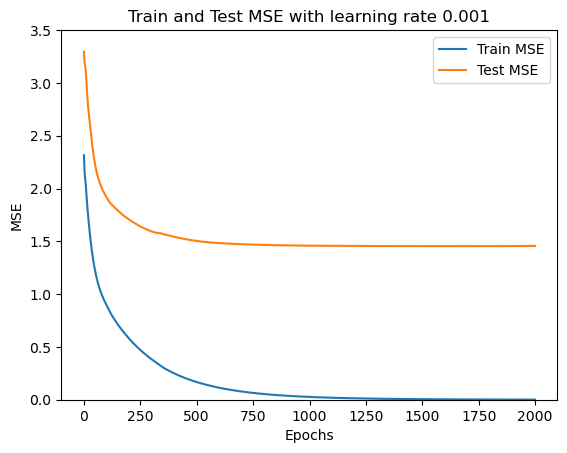

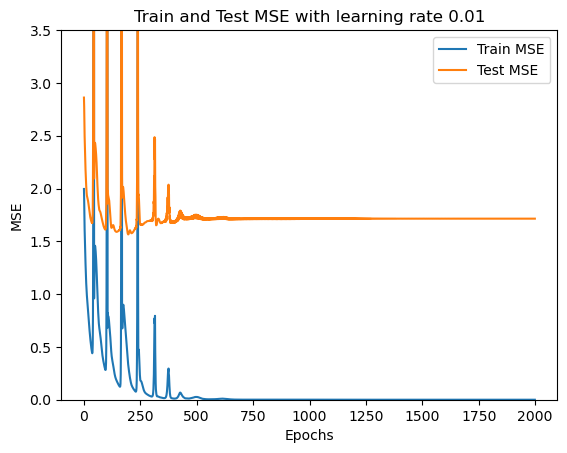

In [333]:
learning_rates = [0.00001, 0.0001, 0.001, 0.01]

train_errors_all = []
test_errors_all = []

for learning_rate in learning_rates:
    regr = MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant', learning_rate_init=learning_rate)
    train_errors, test_errors = test_regression(regr, X_train, y_train, X_test, y_test, epochs=2000)
    train_errors_all.append(train_errors)
    test_errors_all.append(test_errors)

    plt.plot(train_errors, label='Train MSE')
    plt.plot(test_errors, label='Test MSE')
    plt.title(f'Train and Test MSE with learning rate {learning_rate}')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.ylim(0, 3.5)
    plt.legend()
    plt.show()

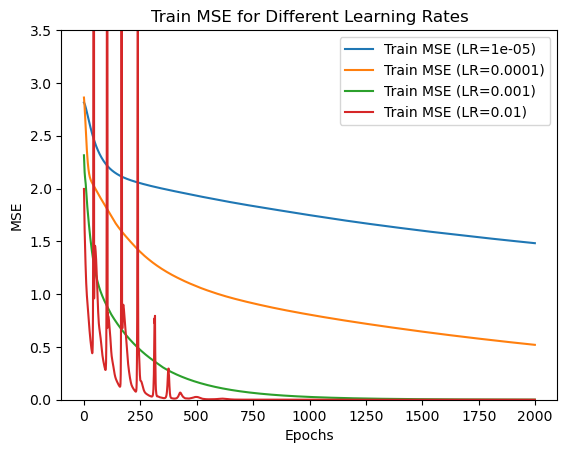

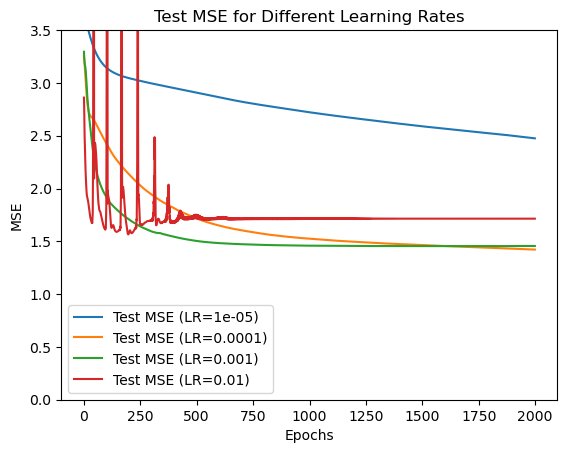

In [334]:
# Wykres dla zbioru treningowego
for i, learning_rate in enumerate(learning_rates):
    plt.plot(train_errors_all[i], label=f'Train MSE (LR={learning_rate})')

plt.title('Train MSE for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim(0, 3.5)
plt.legend()
plt.show()

# Wykres dla zbioru testowego
for i, learning_rate in enumerate(learning_rates):
    plt.plot(test_errors_all[i], label=f'Test MSE (LR={learning_rate})')

plt.title('Test MSE for Different Learning Rates')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim(0, 3.5)
plt.legend()
plt.show()

Podsumowanie:

Najlepszym tempem uczenia okazało się `learning_rate=0.0001`, bardzo blisko było również `learning_rate=0.001`, ale przegrało w okolicach 1500 epoki. Można przy tym tempie zauważyć również zjawisko przeuczenia. Przy `learning_rate=0.00001` tempo uczenia modelu było zdecydowanie zbyt wolne, aby osiągnąć zadowalający wynik. Natomiast dla `learning_rate=0.01` model był niestabilny i wykonywał losowe skoki wokół wartości błędu średniokwadratowego na zbiorze treningowym i testowym.

#### Badanie wpływu rozmiaru modelu MLP na jakość działania

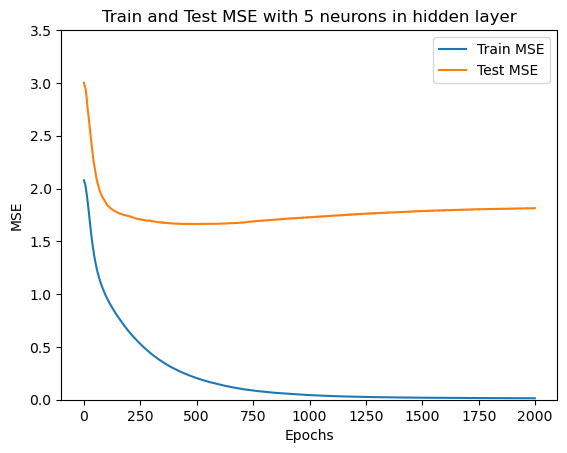

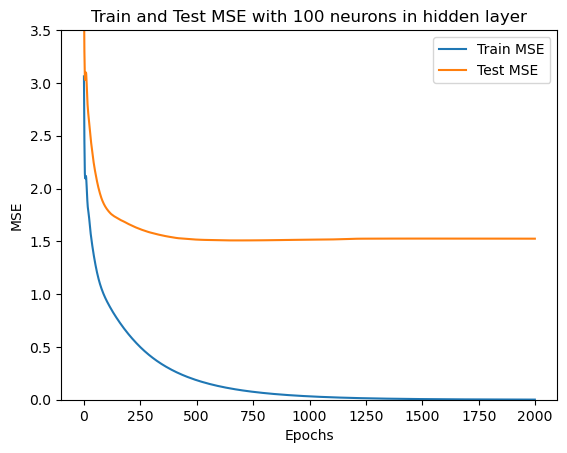

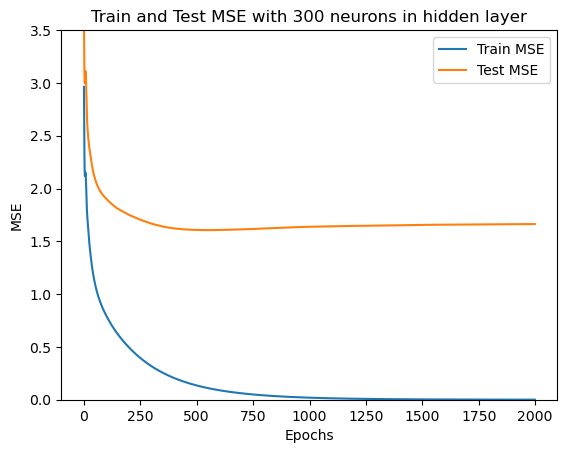

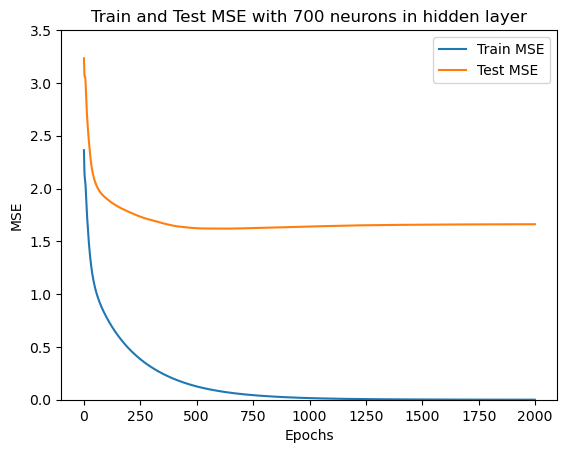

In [335]:
hidden_layer_sizes = [5, 100, 300, 700]

train_errors_all = []
test_errors_all = []

for size in hidden_layer_sizes:
    regr = MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant', hidden_layer_sizes=(size,))
    train_errors, test_errors = test_regression(regr, X_train, y_train, X_test, y_test, epochs=2000)
    train_errors_all.append(train_errors)
    test_errors_all.append(test_errors)

    plt.plot(train_errors, label='Train MSE')
    plt.plot(test_errors, label='Test MSE')
    plt.title(f'Train and Test MSE with {size} neurons in hidden layer')
    plt.xlabel('Epochs')
    plt.ylabel('MSE')
    plt.ylim(0, 3.5)
    plt.legend()
    plt.show()

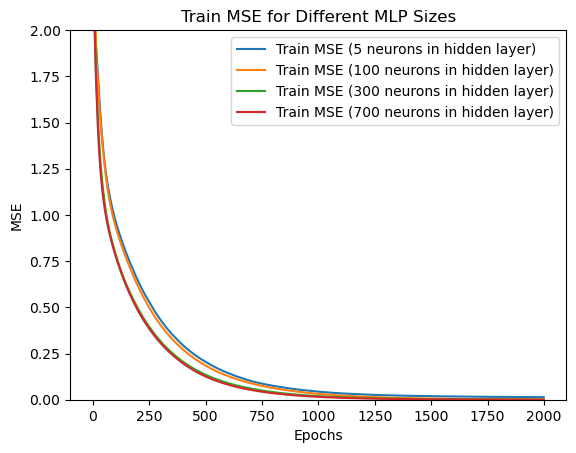

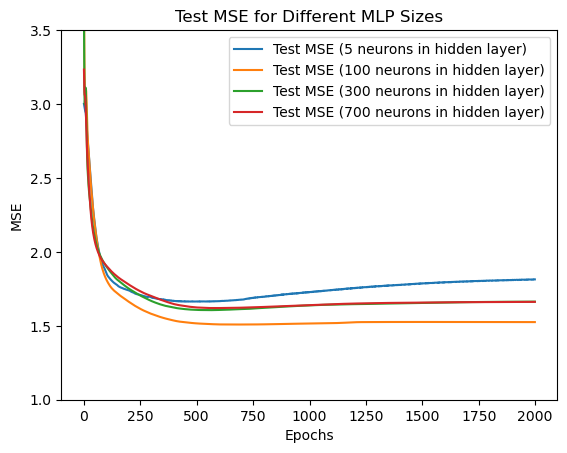

In [336]:
# Wykres dla zbioru treningowego
for i, size in enumerate(hidden_layer_sizes):
    plt.plot(train_errors_all[i], label=f'Train MSE ({size} neurons in hidden layer)')

plt.title('Train MSE for Different MLP Sizes')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim(0, 2)
plt.legend()
plt.show()

# Wykres dla zbioru testowego
for i, size in enumerate(hidden_layer_sizes):
    plt.plot(test_errors_all[i], label=f'Test MSE ({size} neurons in hidden layer)')

plt.title('Test MSE for Different MLP Sizes')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.ylim(1, 3.5)
plt.legend()
plt.show()


Podsumowanie:

Róznice między dopasowaniem modeli do danych treningowych były niewielkie dla wszystkich wartości parametru `hidden_layer_sizes`. Około 1000 epoki wszystkie modele nauczyły się na zbiorze treningowym. Natomiast na zbiorze testowym przy `hidden_layer_sizes=(5,)` model nie dał rady się dobrze nauczyć, a przy `hidden_layer_sizes=(100,)` model okazał się zdecydowanie najlepszy. Przy `hidden_layer_sizes=(300,)` i `hidden_layer_sizes=(700,)` modele osiągnęły bardzo podobne wyniki, ale znacznie gorsze od modelu przy `hidden_layer_sizes=(100,)`. Możliwe, że było to spowodowane przeuczeniem modelu.

#### Przetestowanie modelu MLP na własnych dowcipach

In [337]:
new_jokes = [
    "What's the best thing about Switzerland? I don't know, but the flag is a big plus.",
    "Did you hear about the claustrophobic astronaut? He just needed a little space.",
    "What did one volcano say to the other? I lava you.",
    "What do you call a fake noodle? An impasta.",
    "Patient: Doctor, I think I need glasses. Teller: You certainly do! This is a bank.",
    "There is no room on this planet for anything less than a miracle. We gather here today to revel in the rebellion of a silent tongue",
    "Calculus is the mathematical study of continuous change, in the same way that geometry is the study of shape, and algebra is the study of generalizations of arithmetic operations."
]

In [338]:
new_jokes_embeddings = model.encode(new_jokes)
new_jokes_embeddings.shape

(7, 768)

In [339]:
regr = MLPRegressor(solver='sgd', alpha=0.0, learning_rate='constant', learning_rate_init=0.001, hidden_layer_sizes=(100, ), max_iter=2000)
regr.fit(X_train, y_train)
new_jokes_ratings = regr.predict(new_jokes_embeddings)

In [340]:
for joke, rating in zip(new_jokes, new_jokes_ratings):
    print(f"Joke: {joke}")
    print(f"Predicted Rating: {rating}")
    print()

Joke: What's the best thing about Switzerland? I don't know, but the flag is a big plus.
Predicted Rating: -0.6335921883583069

Joke: Did you hear about the claustrophobic astronaut? He just needed a little space.
Predicted Rating: -0.26734659075737

Joke: What did one volcano say to the other? I lava you.
Predicted Rating: -0.8827853202819824

Joke: What do you call a fake noodle? An impasta.
Predicted Rating: -2.598170518875122

Joke: Patient: Doctor, I think I need glasses. Teller: You certainly do! This is a bank.
Predicted Rating: 0.636936366558075

Joke: There is no room on this planet for anything less than a miracle. We gather here today to revel in the rebellion of a silent tongue
Predicted Rating: 0.04228910058736801

Joke: Calculus is the mathematical study of continuous change, in the same way that geometry is the study of shape, and algebra is the study of generalizations of arithmetic operations.
Predicted Rating: 2.2860968112945557



Podsumowanie:

Predykcja rozminęła się trochę z moimi oczekiwaniami, nie spodziwałam się, że zdanie z wikipedii o analizie matematycznej okaże się według modelu najśmieszniejsze. Zakakujący był również stosunkowo wysoki wynik kilku wersów z jakiegoś losowego wiersza. Natomisat model pogardził moimi żartami określając je jako średnio zabawne. Może to wynikać z tego, ze są dosyć krótkie i używają specyficznych słów, które nie wystąpiły w żartach z danych treningowych.